Objective: to build different classification models (Logistic regression, Naive bayes, K nearest neighbor, Decision tree, Support vector machine) on mushroom data set  to predict whether a mushroom is edible or poisonous based on its physical features and evaluate performances of these models.

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from  sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.decomposition import PCA
import seaborn as sns


loading data set and checking top 5 rows.

In [85]:
df= pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Here I have listed meaning of different categories of each column

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type: partial=p (universal=u)
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: evanescent=e,flaring=f,large=l,none=n,pendant=p
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
classes: edible=e, poisonous=p




Checking columns data type and null values

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

checking null values

In [87]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Making  a list of names of all the columns 

In [88]:
tot_columns=df.columns.to_list()
tot_columns

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

Now I am starting to do exploratory data analysis (EDA) to know more about different features and their relationship with target.

First I want to see data distribution of target column and then data distribution of all features to get a good idea about this data set.

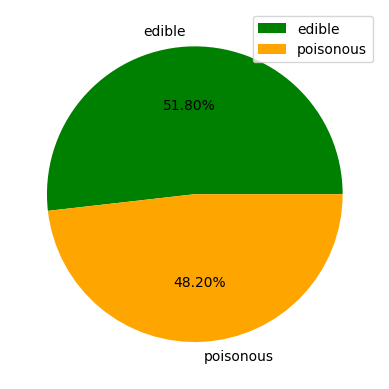

In [89]:
class_df=df['class'].value_counts().reset_index()
class_df

plt.pie(class_df['count'], labels=['edible','poisonous'], autopct='%1.2f%%', colors=['green','orange'])
plt.legend()

We can see from above pie chart that our data set is very much balanced as both categories in the target colum are in almost equal proportion.

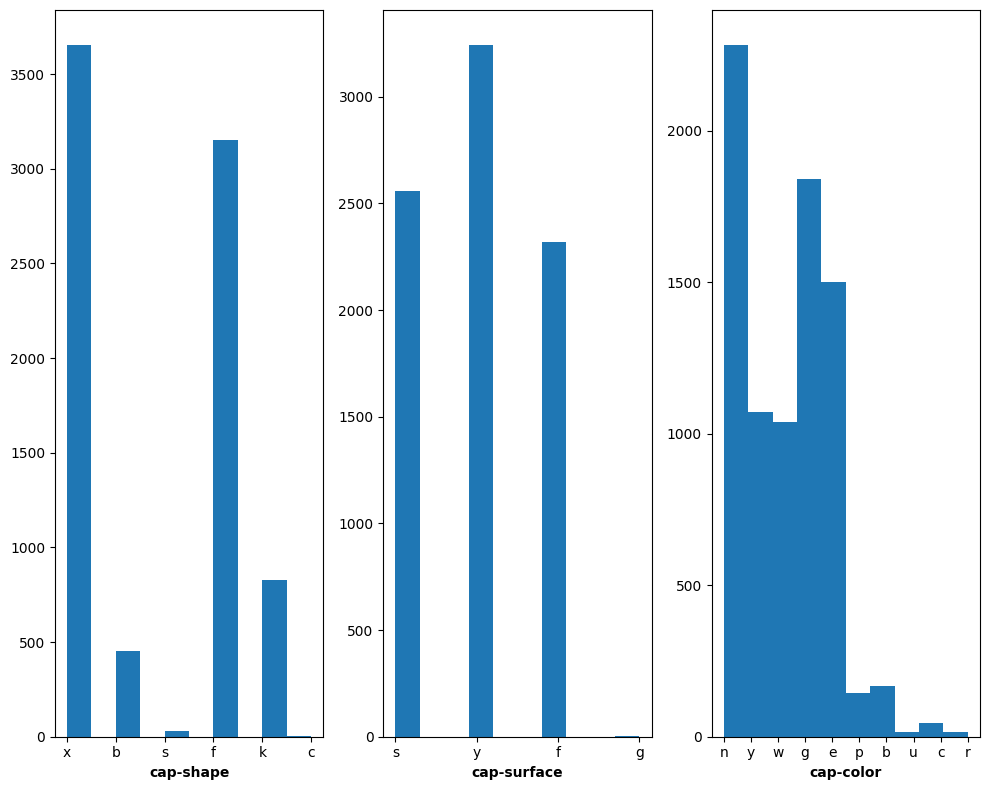

In [90]:
fig, ax=plt.subplots(1,3, figsize=(10,8))
cap=['cap-shape', 'cap-surface','cap-color']
for i in range(len(cap)):
    ax[i].hist(df[cap[i]])
    ax[i].set_xlabel(cap[i], fontweight='bold')
plt.tight_layout()


In above plot we can see data distribution of columns 'cap-shape', 'cap-surface','cap-color'.

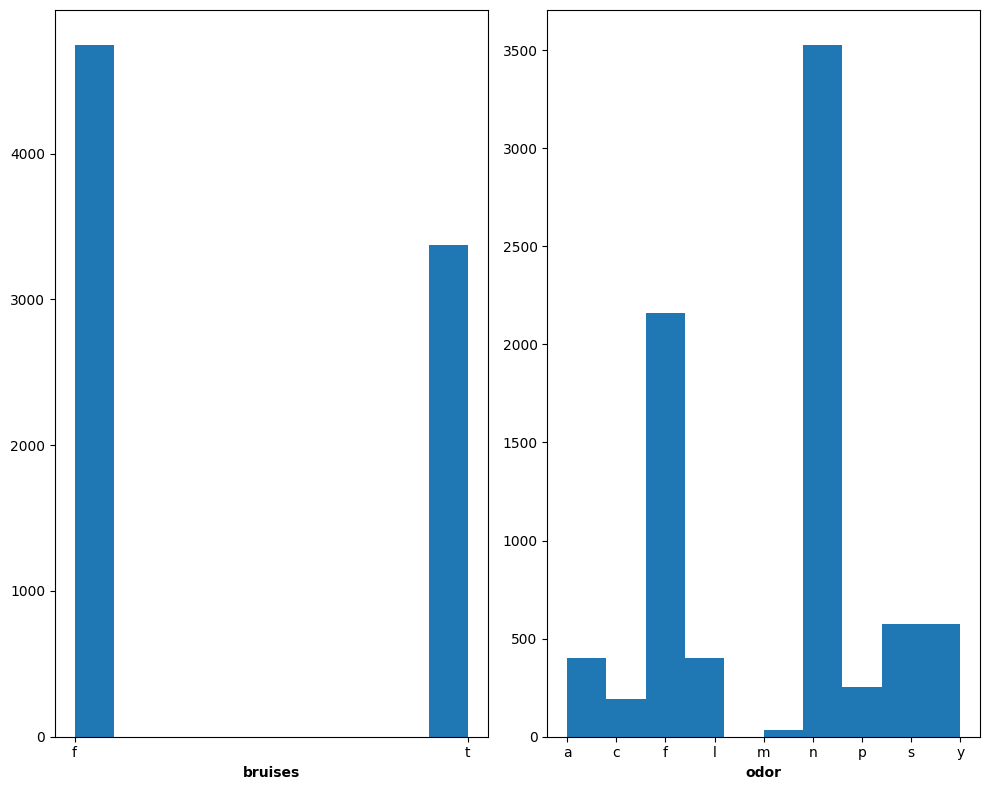

In [91]:
fig, ax=plt.subplots(1,2, figsize=(10,8))
body=['bruises','odor']
for i in range(len(body)):
    ax[i].hist(df[body[i]].sort_values())
    ax[i].set_xlabel(body[i], fontweight='bold')
plt.tight_layout()


In above plot we can see data distribution of features 'bruises' and 'odor' . Bruising of mushroom means changes in colour of mushroom (usually blue, brown, or black) that occurs when a mushroom is touched, pressed, or cut.


Text(0.5, 1.0, 'Mushroom count by odor')

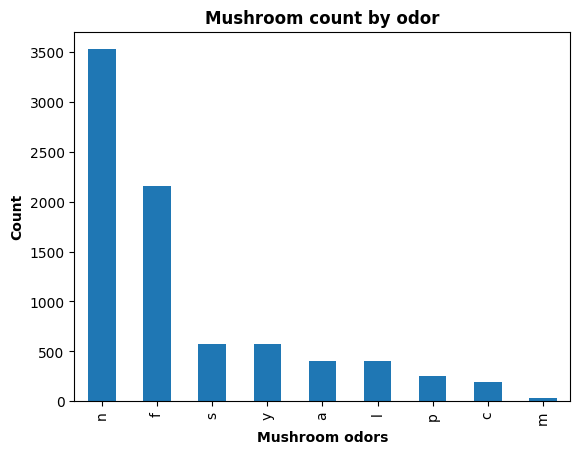

In [92]:
# to make bar graph showing descending order of odor
df['odor'].value_counts().plot(kind='bar')
plt.xlabel('Mushroom odors', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Mushroom count by odor', fontweight='bold')

in the above plot we can see that most mushroom have either no any odor or foul odor

Text(0.5, 1.0, 'Mushroom count by cap colours')

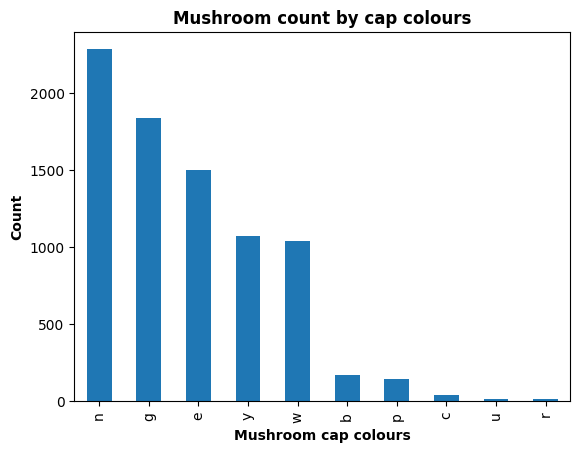

In [93]:
df['cap-color'].value_counts().plot(kind='bar')
plt.xlabel('Mushroom cap colours', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Mushroom count by cap colours', fontweight='bold')

Text(0.5, 1.0, 'Mushroom count by gill attachment')

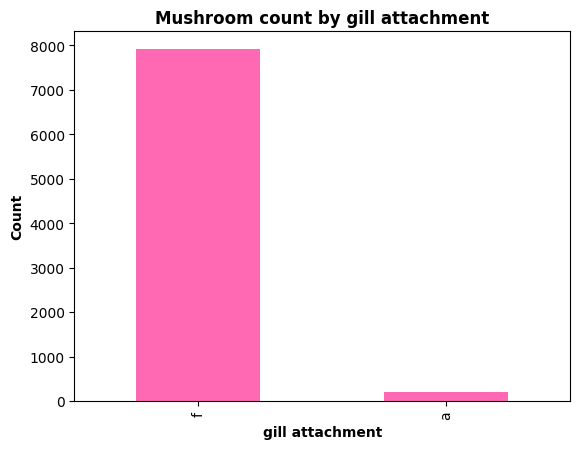

In [94]:
df['gill-attachment'].value_counts().plot(kind='bar', color='hotpink')
plt.xlabel('gill attachment', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Mushroom count by gill attachment', fontweight='bold')

In above graph, we can see that most of the mushroom gill's are not attached to the stalk. It's free type.

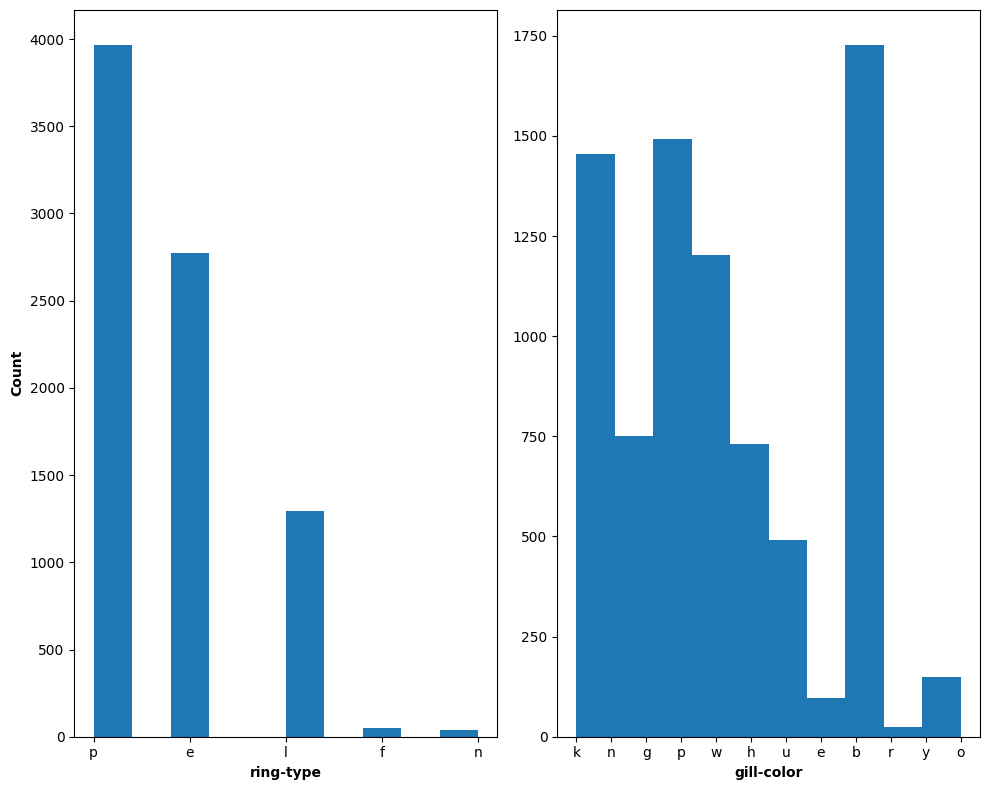

In [95]:
fig, ax=plt.subplots(1,2, figsize=(10,8))
body=['ring-type', 'gill-color']
for i in range(len(body)):
    ax[i].hist(df[body[i]])
    ax[i].set_xlabel(body[i], fontweight='bold')
    if i==0:
         ax[i].set_ylabel('Count', fontweight='bold')
    plt.tight_layout()


Data distribution of the columns ring-type and gill-color has shown above 

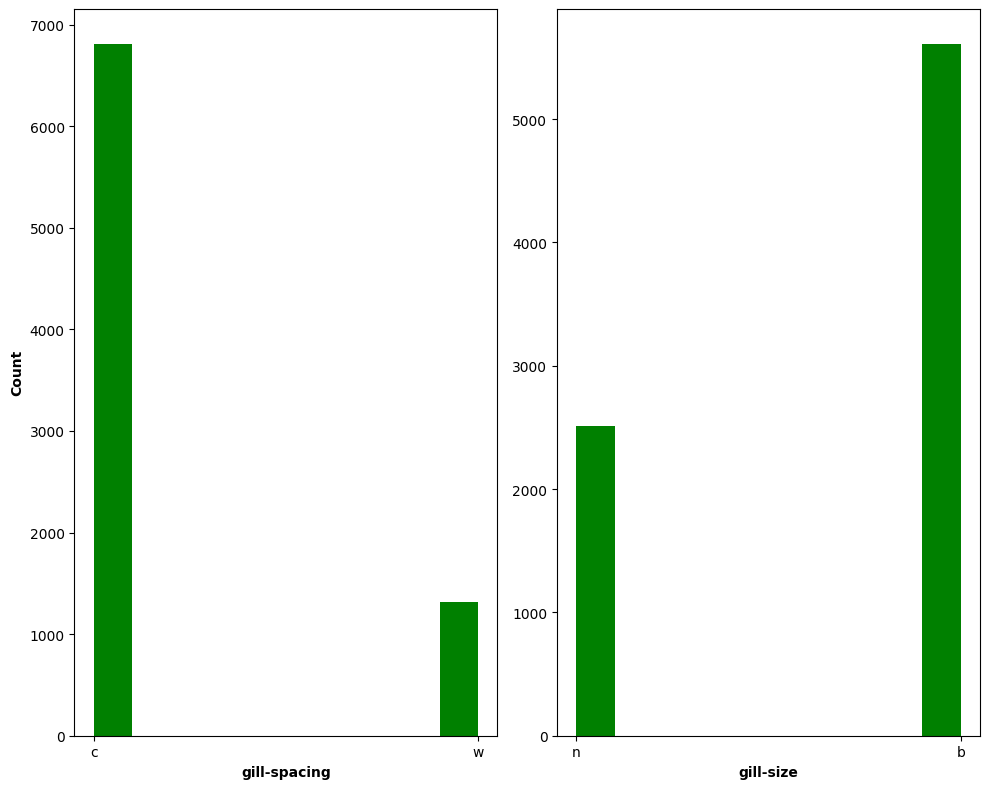

In [96]:
fig, ax=plt.subplots(1,2, figsize=(10,8))
body=['gill-spacing','gill-size']
for i in range(len(body)):
    ax[i].hist(df[body[i]], color='green')
    ax[i].set_xlabel(body[i], fontweight='bold')
    if i==0:
         ax[i].set_ylabel('Count', fontweight='bold')

plt.tight_layout()


In above graph, we can see that most of the mushrooms have close gill spacing and broad gill-size.

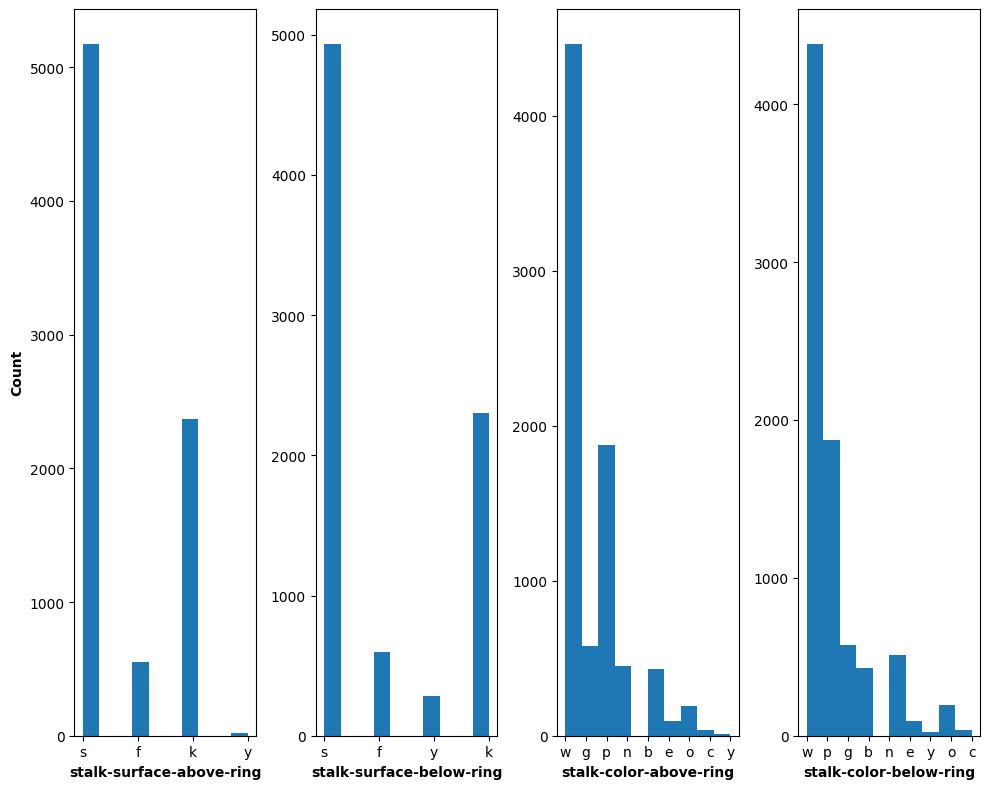

In [97]:
fig, ax=plt.subplots(1,4, figsize=(10,8))
body=['stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring']
for i in range(len(body)):
    ax[i].hist(df[body[i]])
    ax[i].set_xlabel(body[i], fontweight='bold')
    if i==0:
         ax[i].set_ylabel('Count', fontweight='bold')
    plt.tight_layout()

In above graph, it's clear that most common stalk surface above ring and below ring is smooth surface and most common stalk color above ring and below ring is white.


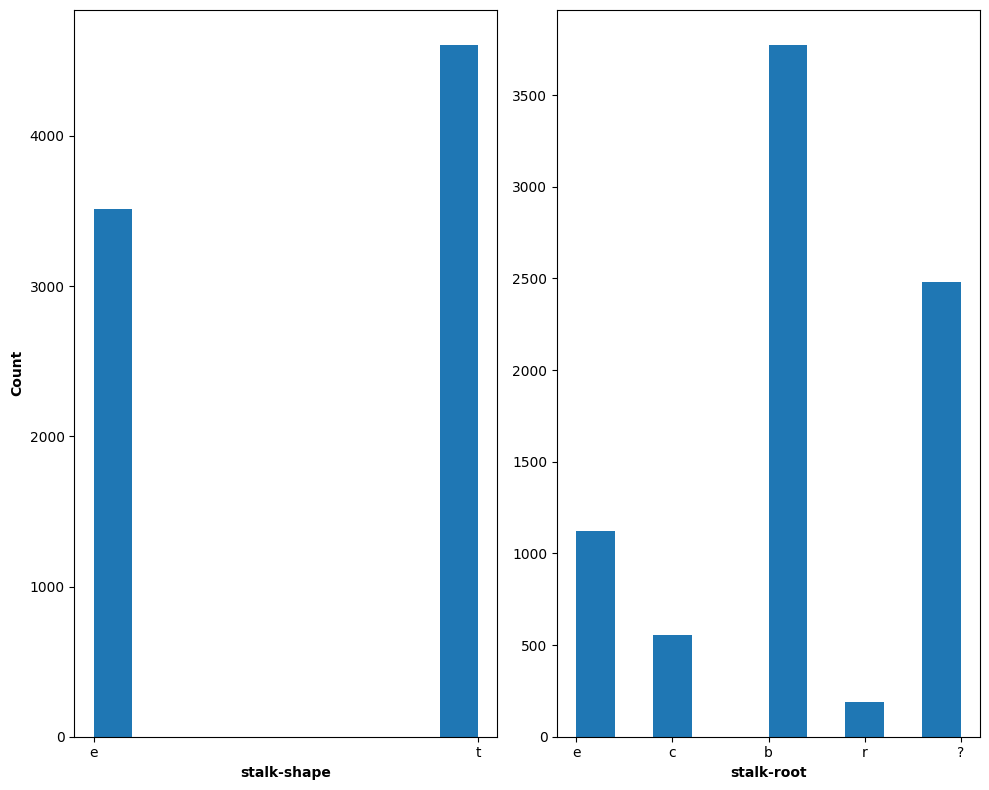

In [98]:
fig, ax=plt.subplots(1,2, figsize=(10,8))
body=['stalk-shape','stalk-root']
for i in range(len(body)):
    ax[i].hist(df[body[i]])
    ax[i].set_xlabel(body[i], fontweight='bold')
    if i==0:
         ax[i].set_ylabel('Count', fontweight='bold')
    plt.tight_layout()


Above graph is showing the data distribution of colums stalk-shape stalk root. We can see here that we have missing/unknown values in stalk-root colum which has been represented by '?'

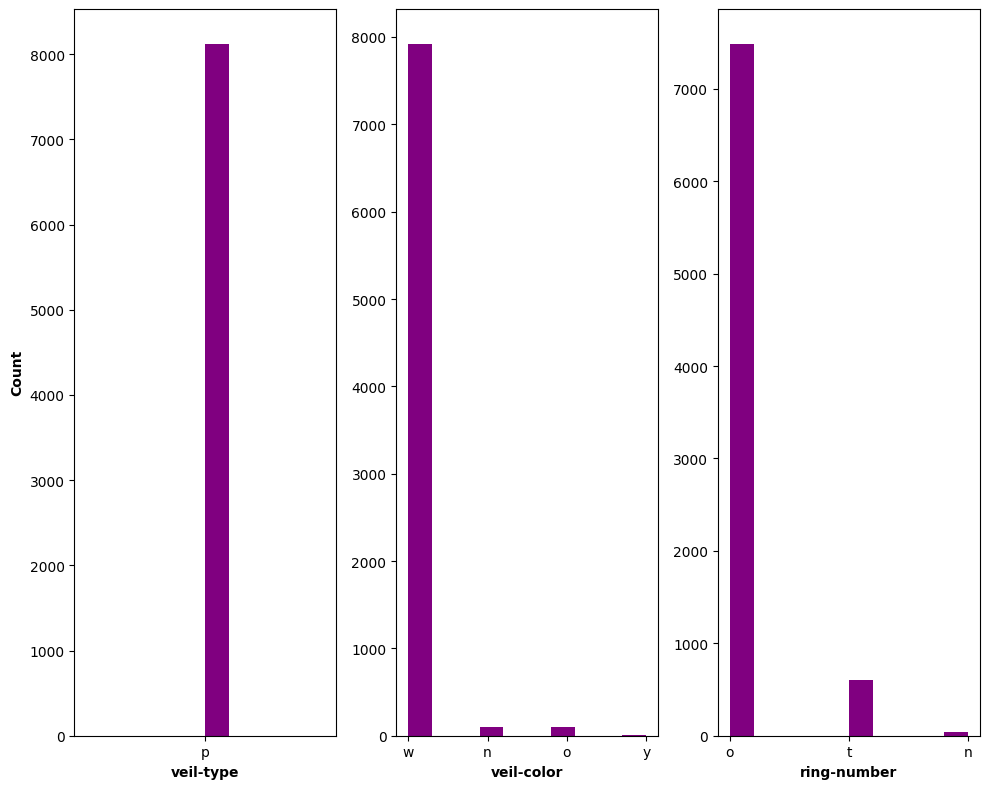

In [99]:

fig, ax=plt.subplots(1,3, figsize=(10,8))
body=['veil-type','veil-color','ring-number']
for i in range(len(body)):
    ax[i].hist(df[body[i]], color='purple')
    ax[i].set_xlabel(body[i], fontweight='bold')
    if i==0:
         ax[i].set_ylabel('Count', fontweight='bold')
    plt.tight_layout()


It's clear from above graph that all the mushrooms have partial veil type and most of the mushrooms have white viel colour and one ring.

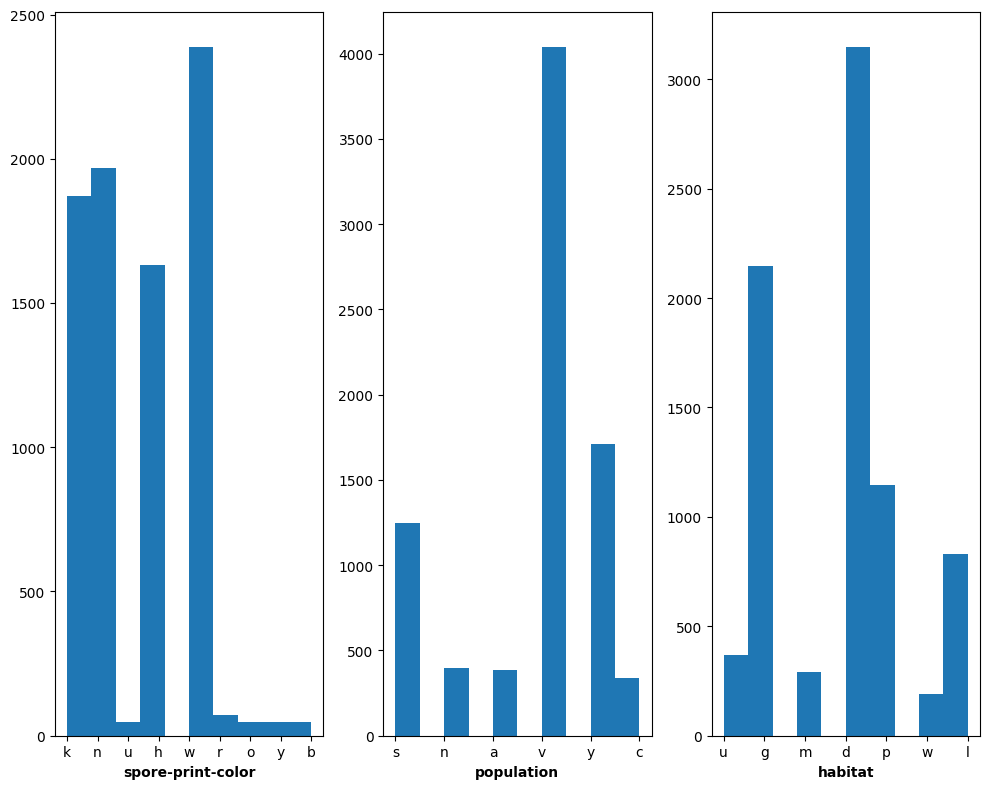

In [100]:
fig, ax=plt.subplots(1,3, figsize=(10,8))
body=['spore-print-color','population','habitat']
for i in range(len(body)):
    ax[i].hist(df[body[i]])
    ax[i].set_xlabel(body[i], fontweight='bold')
    plt.tight_layout()


Above graph is showing the data distribution of features spore-print-colour, population and habitat.

Now I am checking what percentage of value from stalk-root column is missing/unkmown (represented by ?).

In [101]:
df['stalk-root'].value_counts()/len(df)*100

stalk-root
b    46.479567
?    30.526834
e    13.786312
c     6.843919
r     2.363368
Name: count, dtype: float64

I am making a list of all columns. All columns except column 'class' are our features columns.

In [102]:
tot_columns=df.columns.to_list()
feature_col= tot_columns[1:]

Now I want to see how different features are related with target. I have used for loop to make all 22 graph at once.

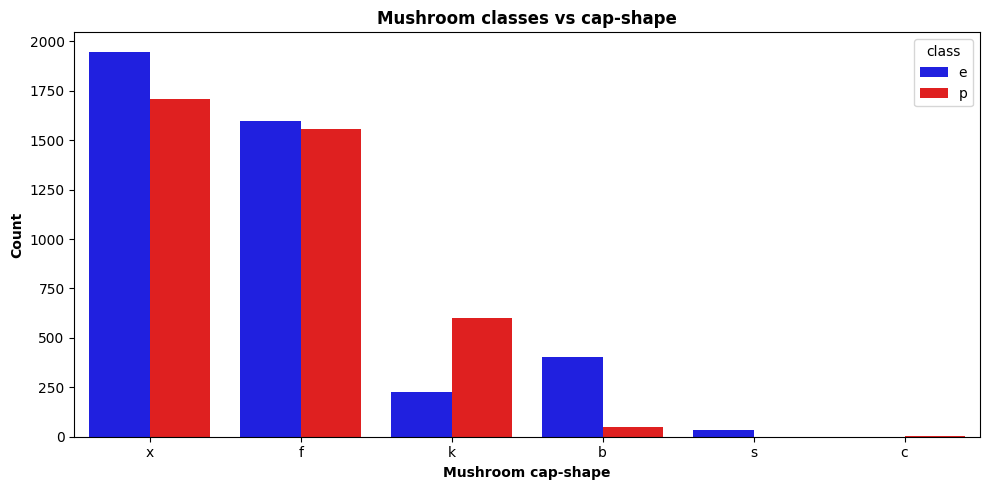

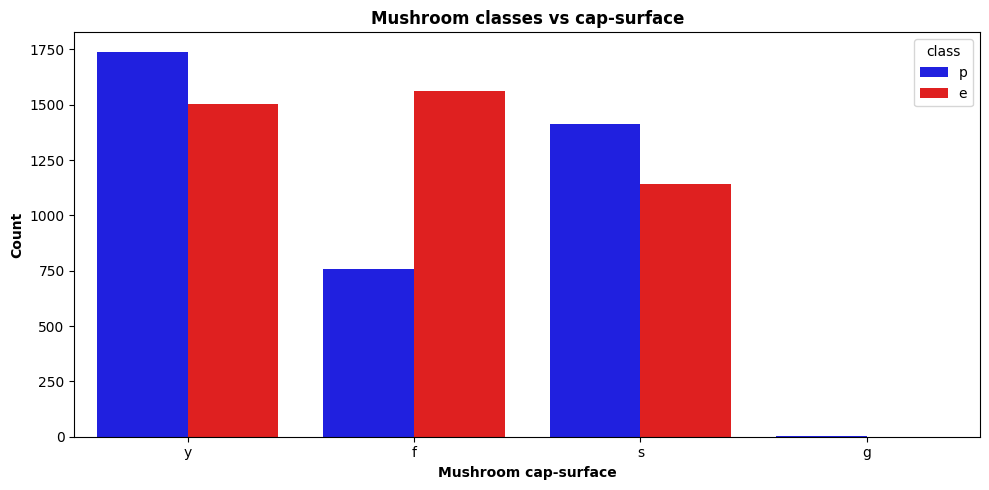

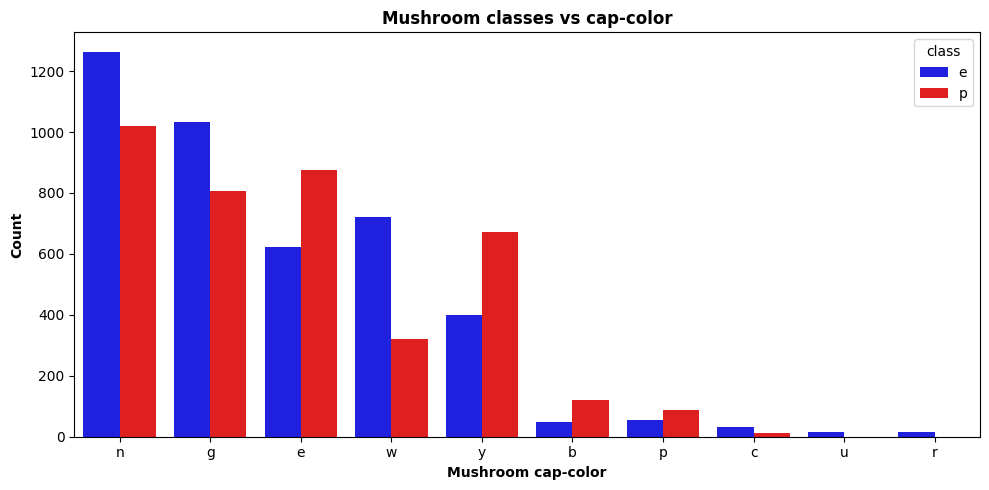

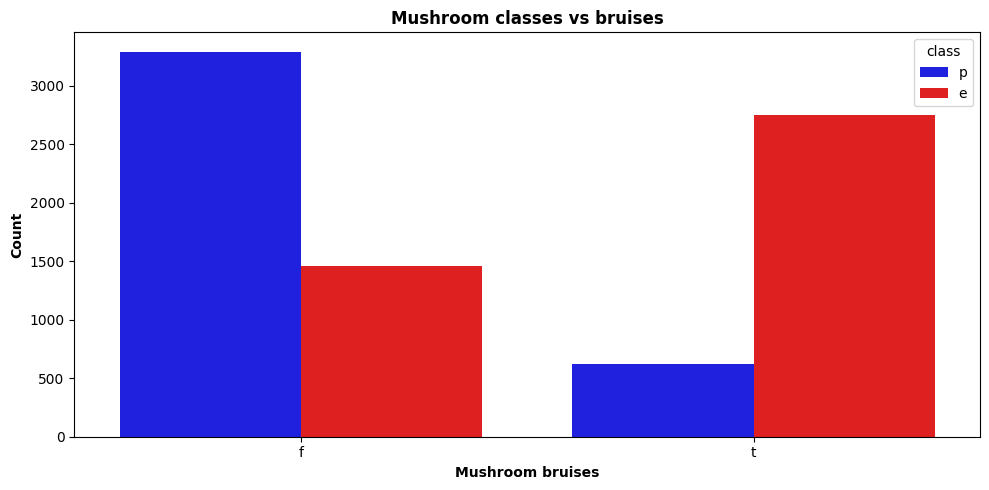

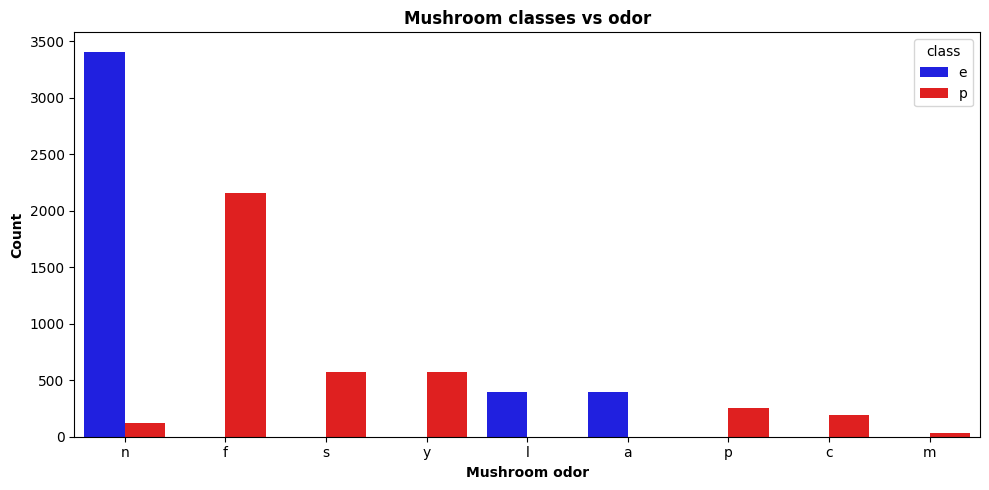

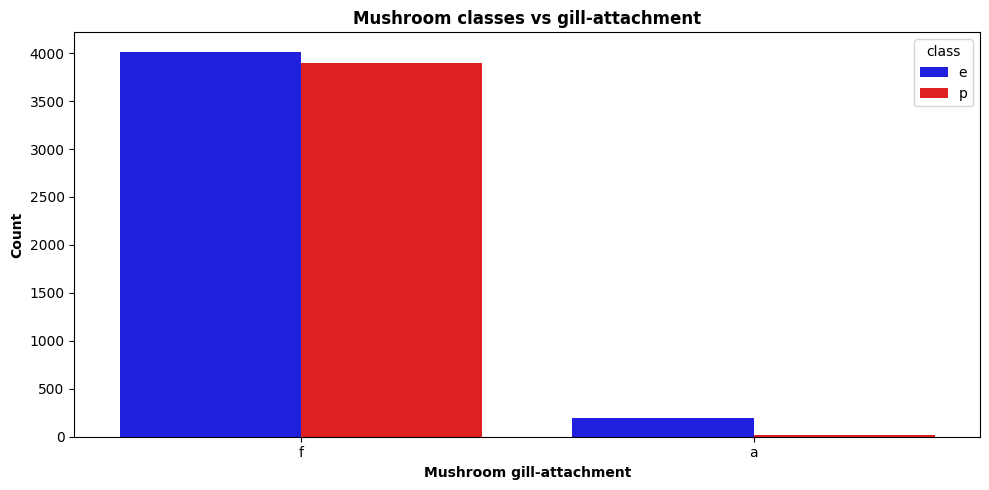

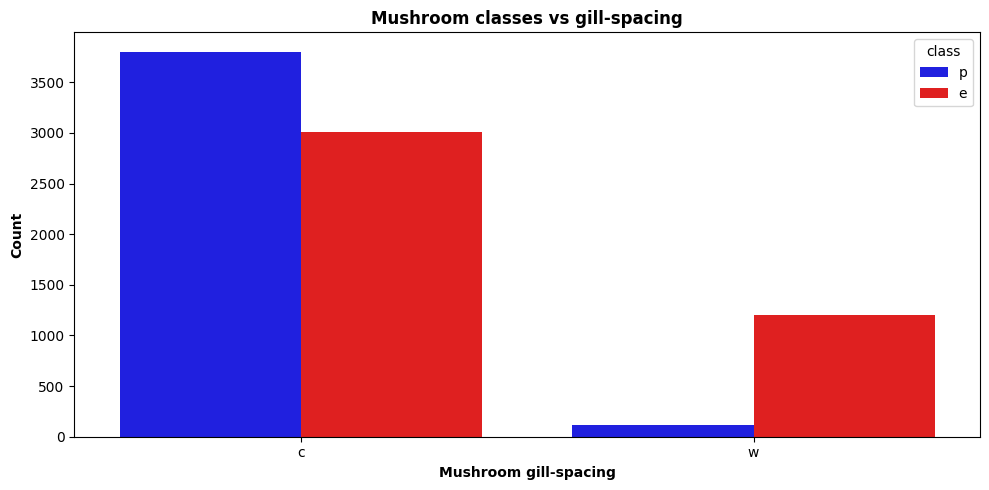

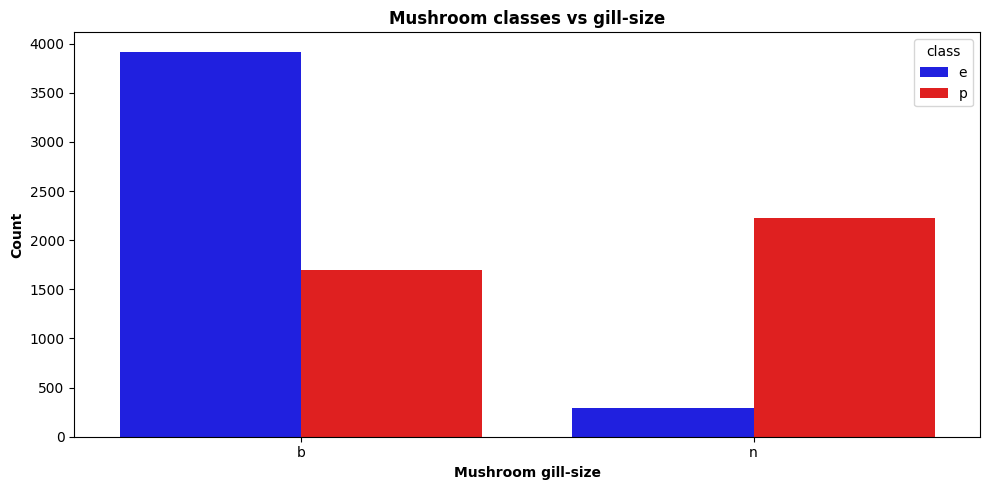

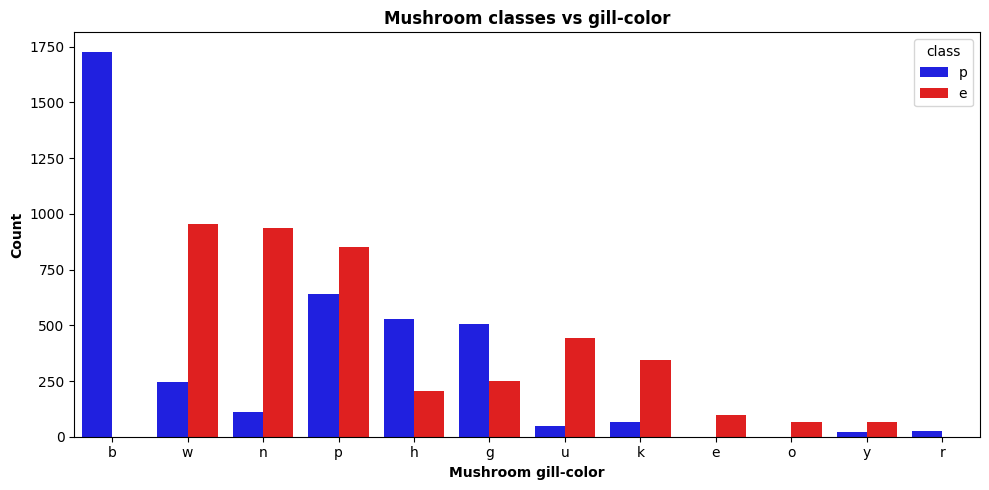

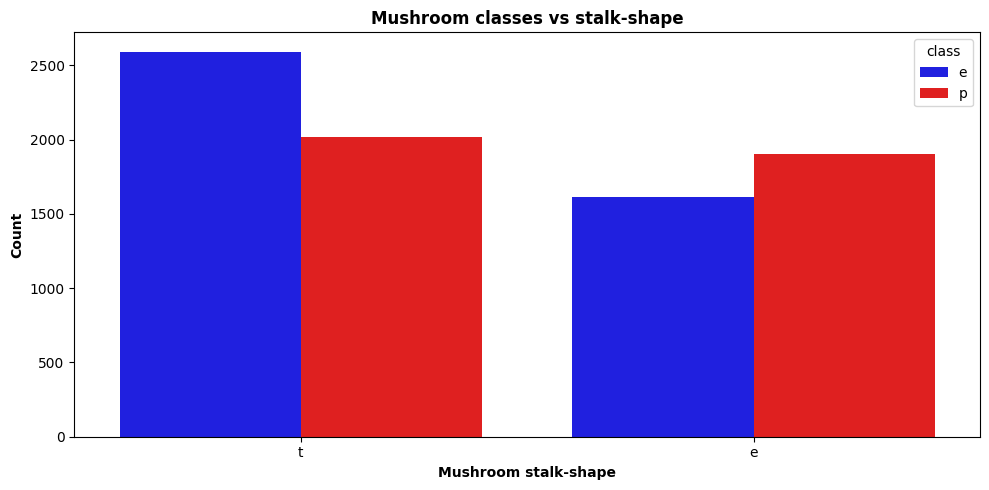

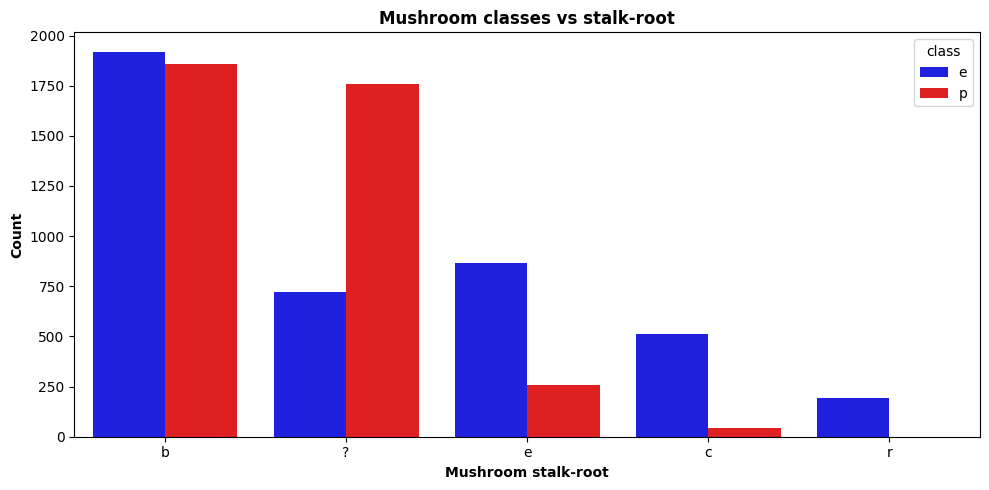

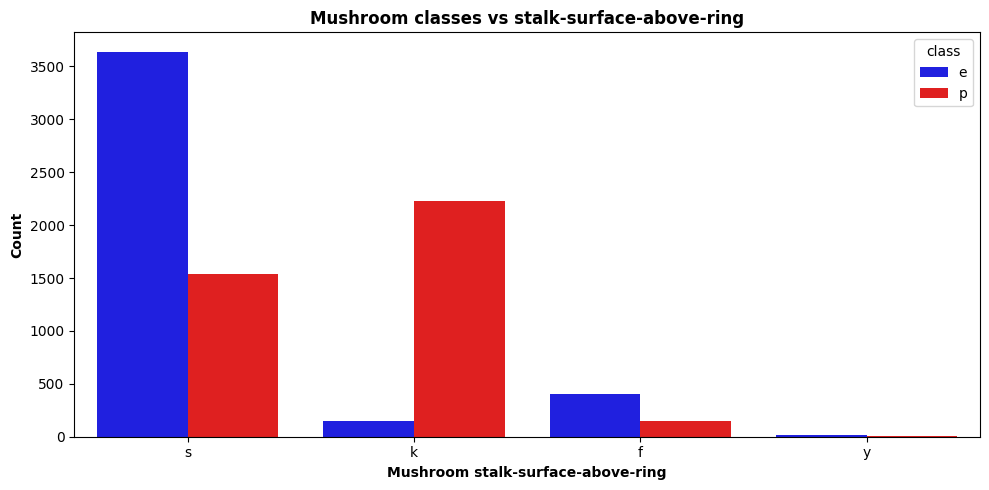

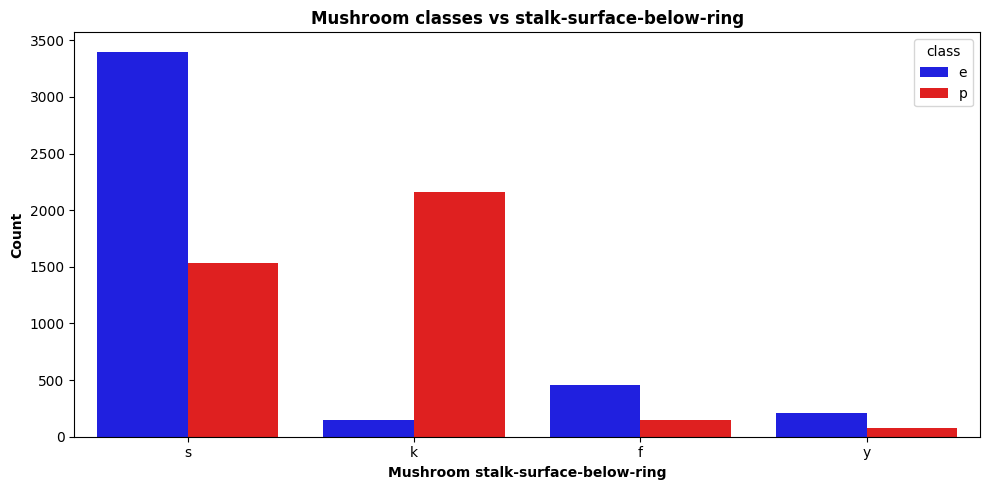

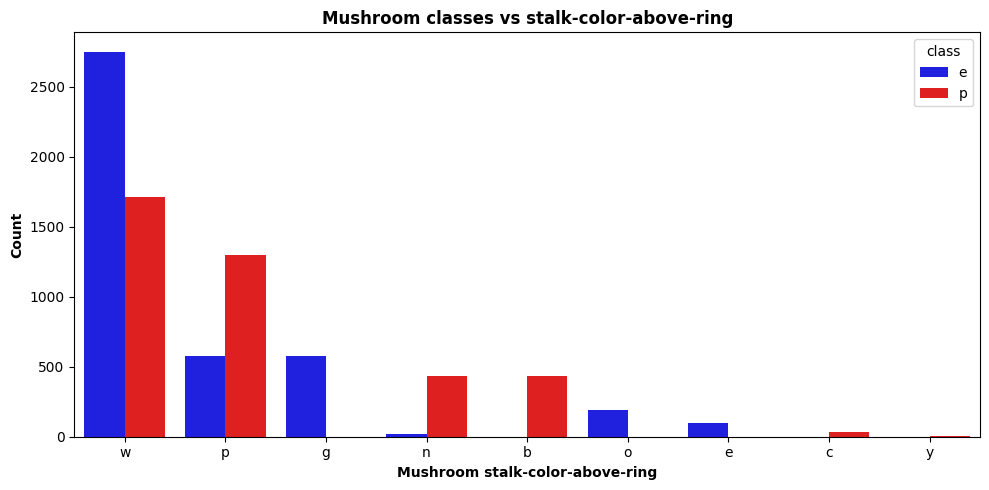

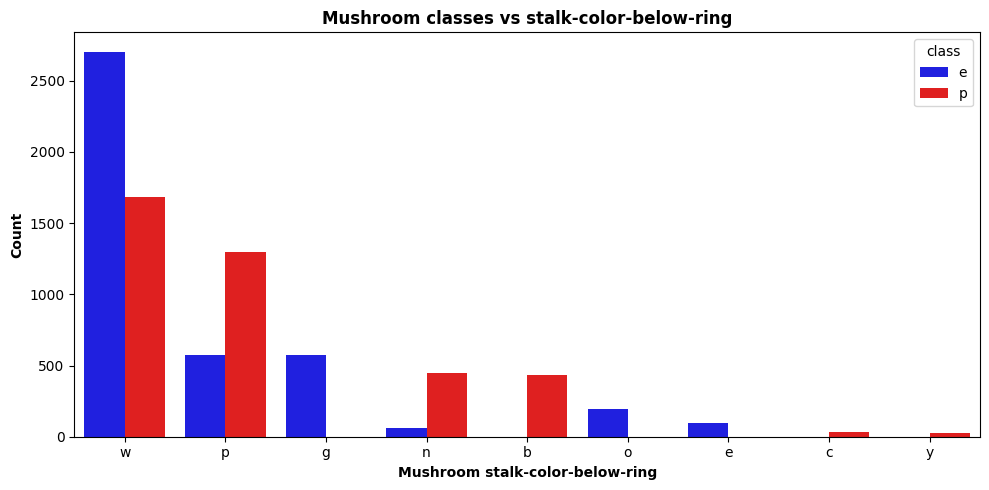

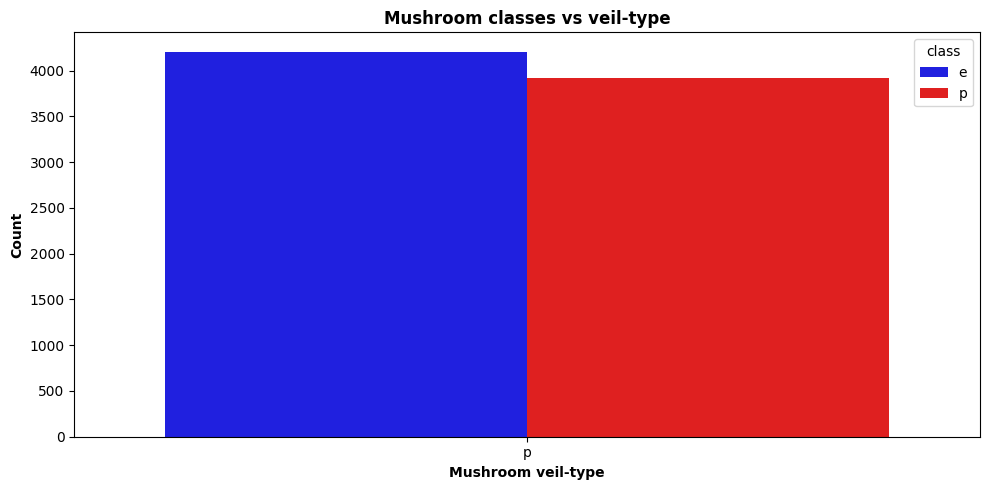

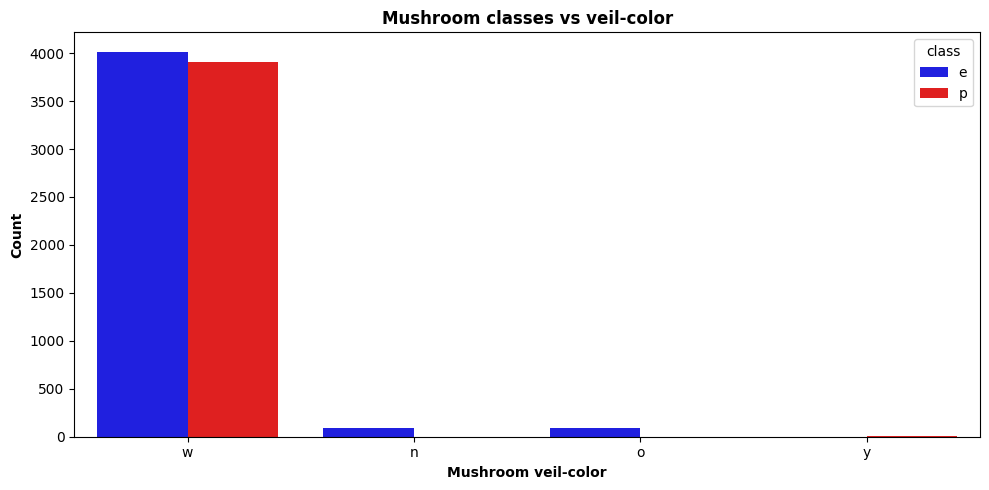

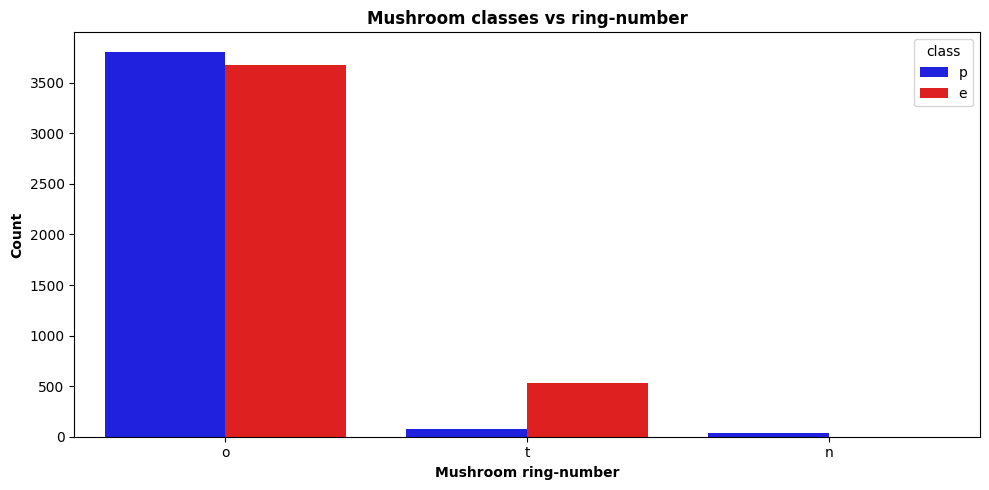

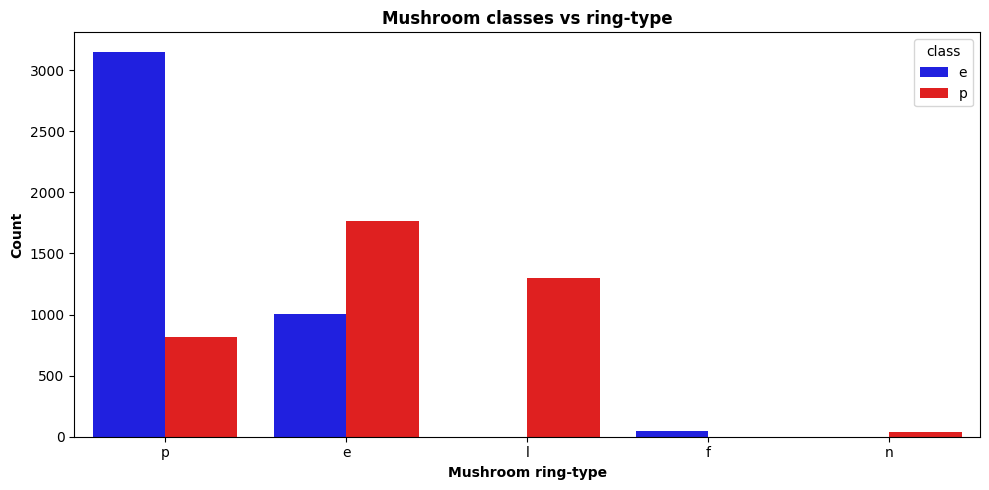

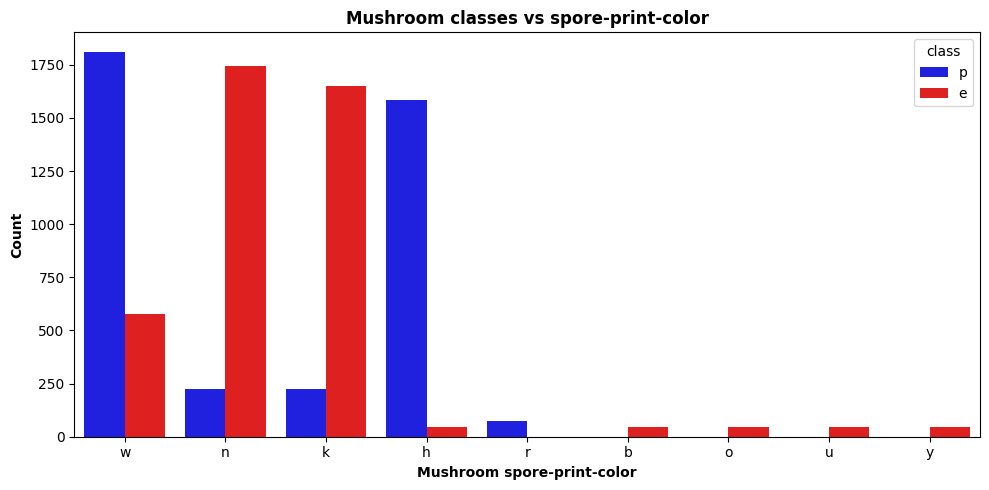

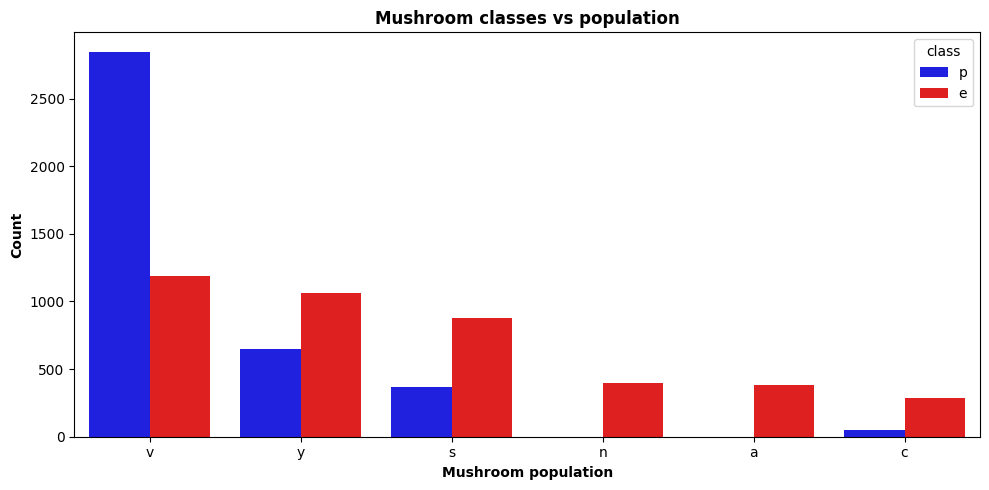

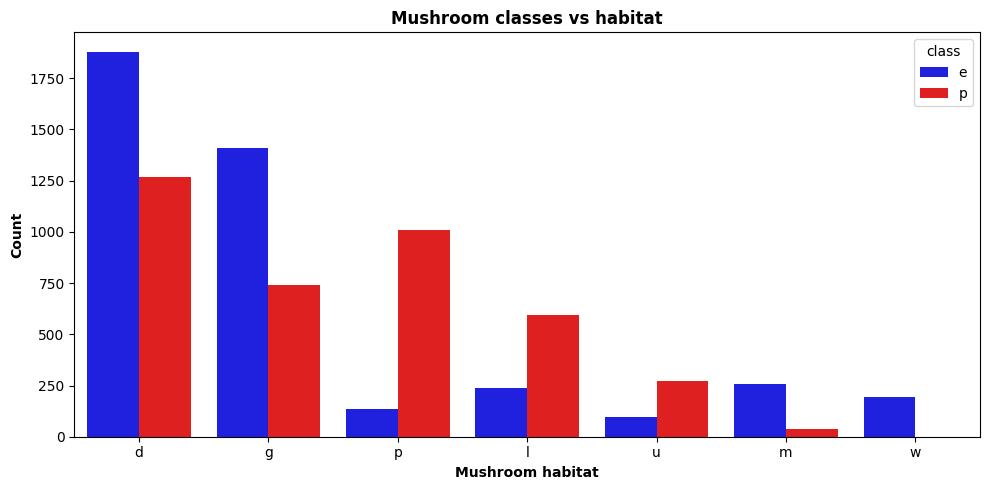

In [103]:
data_frames=[]
for i in range(len(feature_col)):
    data_all=df[[feature_col[i], 'class']].value_counts().reset_index()
    data_frames.append(data_all)

    plt.figure(figsize=(10,5))

    sns.barplot(data=data_all, x=feature_col[i], y='count', hue='class', palette=["blue","red"])
    plt.title(f'Mushroom classes vs {feature_col[i]}', fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.xlabel(f'Mushroom {feature_col[i]}', fontweight='bold')
    plt.tight_layout()
    plt.show()



There are lots of insights we can get from above 22 graphs and I am listing out few of them.
1. If bruising doesn't occur then it's more likely that mushroom is poisonous but if bruising occurs then it's more likely that its a edible one.
2. If mushroom has no odor then it's more likely that it's edible one but if it has fishy, spicy, foul, pungent, creosote or musty odor then it's more likely that mushroom is of poisonous category.
3. If mushroom spore print is white or chocolate in colour then it has more probability that it's poisonous.
4. Mushroom grown on pathways and leaves gives us more indication that it's of poisonous category.
5. If mushroom has large or evanescent (fragile) ring then it's more likely that it belongs to poisonous category.
6. Proportion of mushroom belongs to either of these category is very similar for features stalk_colour_above_ring and
stalk_colour_below_ring, which indicates that there must be a correlation between these two features.


Checking count of different classes/categories in target column

In [140]:
df['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

Now I am changing the class's categories from e and p to 0 and 1 respectively by label encoder.

In [141]:
encod=LabelEncoder()
df['class']=encod.fit_transform(df['class'])


Rechecking classes categories after label encoder

In [142]:
df['class'].value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

Now I am checking how many categories we have in each column

In [107]:
df[df.columns.to_list()].nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Now I am checking how many categories we have in total in our data set.

In [108]:
df[df.columns.to_list()].nunique().sum()

np.int64(119)

Now I am replacing '?' of stalk-root column to mode. 

In [143]:
df['stalk-root'].value_counts()

stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64

In [144]:
df['stalk-root']= df['stalk-root'].replace('?', 'b')


In [145]:
df['stalk-root'].value_counts()

stalk-root
b    6256
e    1120
c     556
r     192
Name: count, dtype: int64

Making list fo all features column

In [ ]:

x_column=df.columns.tolist()[1:]



Now I am changing all the features categories into numeric categories by one hot encoder. I didn't use label encoder because i want to give equal importance to each category of each feature.

In [113]:
hot_enco=OneHotEncoder(sparse_output=False)
hot_enco_colum=hot_enco.fit_transform(df[x_column])
encoded_df = pd.DataFrame(hot_enco_colum, columns=hot_enco.get_feature_names_out())

df= pd.concat([df, encoded_df], axis=1)
encoded_df.shape # checking shape to confirm that features columns have been converted into numeric ones




(8124, 116)

now I am assigning x as features and y as target column

In [114]:

x=encoded_df
y=df['class']
x

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

I am now spliting the data into training and tesing sets. I have use 20% data for tesing.

In [116]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=.2, random_state=32)

I am trying to find the optimum nearest neighbour value for k nearest neibhbour classifier.

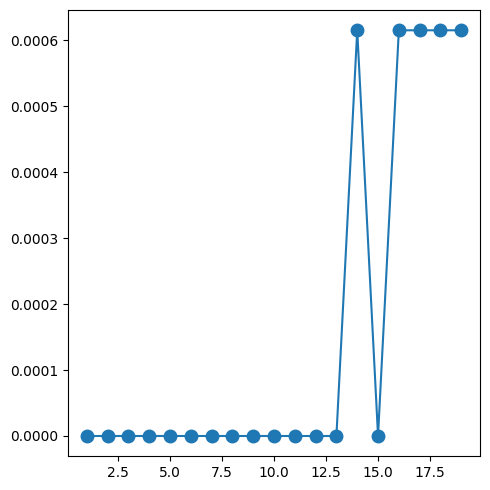

In [117]:
#finding the number of neighbours for knn
error_rate=[]

for i in range(1,20):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))
plt.figure(figsize=(5,5))
plt.plot(range(1,20), error_rate, marker ='o', markersize=9)
plt.tight_layout()

From above graph I have chosen 5 as nearest neighbour value because error rate is minimum at that point.

Now I want to train different machine learing models (Logistic regression, Naive bayes, K nearest neighbor, Decision tree, Support vector machine). I am using for loop to train different models and then evaluate its accuracy score and classification report.

In [119]:
#making list of all ML models
classification_models=[LogisticRegression(), GaussianNB(), KNeighborsClassifier(n_neighbors=5),
                        DecisionTreeClassifier(criterion='gini', random_state=32),
                        DecisionTreeClassifier(criterion='entropy', random_state=32),
                        svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),svm.SVC(kernel='sigmoid')]

model_name =['log_reg','naive_b','knn', 'DT_gini', 'DT_entropy', 'svm_linear', 'svm_rbf','svm_sigmoid']

all_accuracy_score=[] # I have made this list to plot different ML models vs accuracy scores later on

#Creating for loop to train different models
for i in range(len(classification_models)): 
    model=classification_models[i].fit(x_train,y_train)
    model_pred= model.predict(x_test)

    accuracy=accuracy_score(y_test,model_pred)
    all_accuracy_score.append(accuracy)
    class_report= classification_report(y_test,model_pred)

    
    print(f'Accuracy score for {model_name[i]}: {round(accuracy,3)}')
    print(f'classification report for {model_name[i]}:\n {class_report}')
    

Accuracy score for log_reg: 1.0
classification report for log_reg:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Accuracy score for naive_b: 0.945
classification report for naive_b:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       846
           1       0.90      1.00      0.95       779

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Accuracy score for knn: 1.0
classification report for knn:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      

Now I am plotting different ML models vs accuracy scores

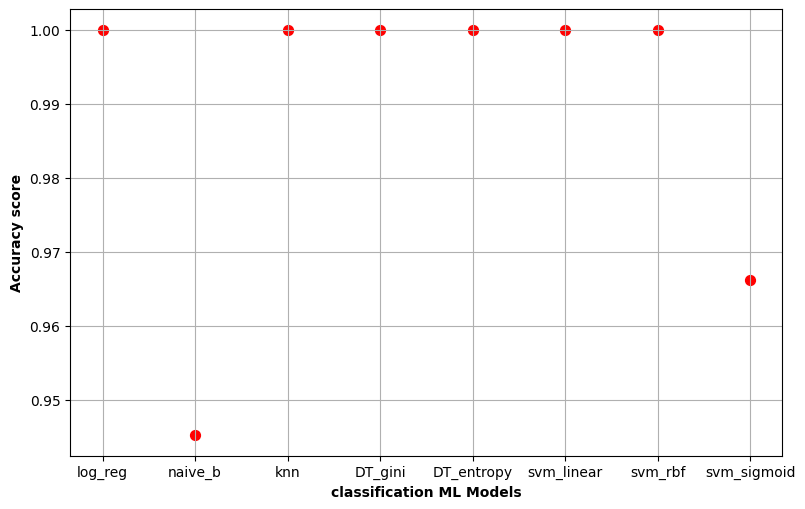

In [120]:
plt.subplots(figsize=(8,5))
plt.scatter(model_name, all_accuracy_score, c = 'r', s=50)
plt.grid(True)
plt.tight_layout()
plt.xlabel('classification ML Models', fontweight='bold')
plt.ylabel('Accuracy score', fontweight='bold');

We can see in above plot that appart from Naive bayes and Support vector machine all the models have shown 100% accuracy.
1. Since naive base model assumes that the features are independent of each other and I have shown earlier that there is correlation betwwen faetures (stalk_color_above_ring, stalk_color_below_ring) that expalins why we got bit lower accuracy score than other models
2. Support vector machine with sigmoid kernel has shown lower accuracy score than other models which expains that there msut be linear relationship between features and target.

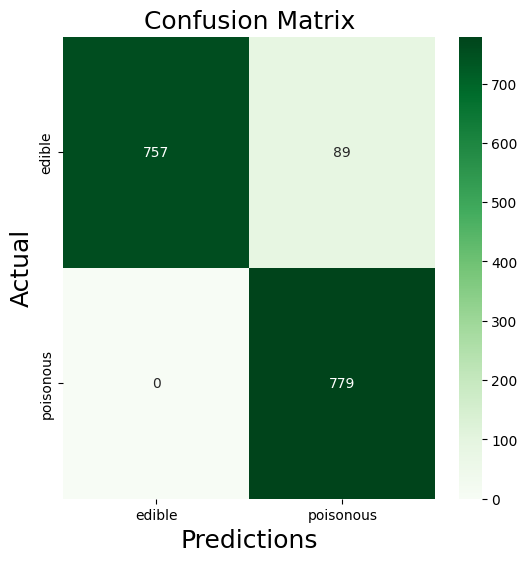

In [121]:
#making confusion matrix of naibe base models
nb_pred=classification_models[1].predict(x_test)
conf_mat = confusion_matrix(y_test, nb_pred)
labels = ['edible', 'poisonous']
# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Above is the confusion matrix of Naive Bayes model. I have shown below the ROC curve of this model to show area under curve (auc) score.

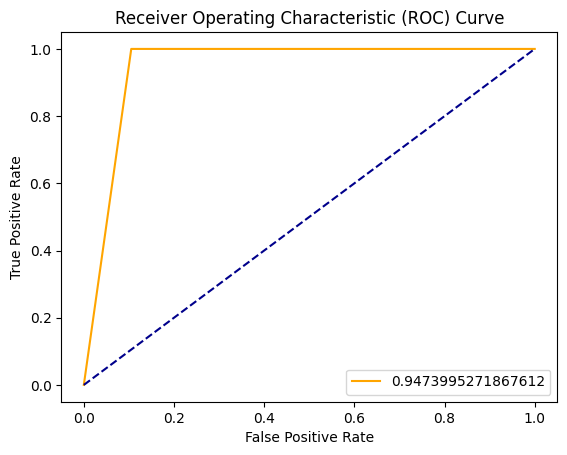

In [147]:
auc = roc_auc_score(y_test, nb_pred)
fpr, tpr, thresholds = roc_curve(y_test, nb_pred)

plt.plot(fpr, tpr, color='orange', label=auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()


for knowledgde purpose I am trying to see how accurancy score changes with cross validation.

Now I checking 5 fold cross validation for logistic regression model

In [125]:
model = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=32)
scores = cross_val_score(model, x, y, cv=kf)
print("K-Fold Cross Validation scores:", scores)
print("Mean accuracy:", np.mean(scores))


K-Fold Cross Validation scores: [1.         0.99938462 1.         1.         1.        ]
Mean accuracy: 0.9998769230769231


Since after aplying one hot encoder my 23 features have changed into 116 features, thus I am trying to see how PCA (Principle Componet Analysis) will reduce the dimentionality.

In [163]:
df1=pd.read_csv('mushrooms.csv')

encod=LabelEncoder()
df1['class']=encod.fit_transform(df1['class'])

df1['stalk-root']= df1['stalk-root'].replace('?','b')

x_column1=df1.columns.tolist()[1:]

hot_enco1=OneHotEncoder(sparse_output=False)
hot_enco_colum1=hot_enco1.fit_transform(df1[x_column1])
encoded_df1 = pd.DataFrame(hot_enco_colum1, columns=hot_enco1.get_feature_names_out())
df1= pd.concat([df1, encoded_df1], axis=1)


x1=encoded_df1
y1= df1['class']

scaler=StandardScaler()
x1=scaler.fit_transform(x1)


In [165]:
pca = PCA(n_components=2)
pca_scaled_x=pca.fit_transform(x1)
pca_scaled_x

array([[-3.75246138, -0.61637898],
       [-4.12073116, -1.73559035],
       [-5.16999869, -1.18777594],
       ...,
       [-2.75252014, 14.66604499],
       [ 2.73879515,  2.74630925],
       [-2.70971635, 16.24362871]], shape=(8124, 2))

In [166]:
pca.explained_variance_ratio_

array([0.09065038, 0.07458612])

we can see above that with n_components=2, only 17% variance has been explained which means that 83% of the information is still in other components. Thus I am inceasing the no. of compenents to 10.

In [167]:
pca = PCA(n_components=10)
pca_scaled_x=pca.fit_transform(x1)
pca_scaled_x

array([[-3.75246138, -0.61637898,  1.08514367, ..., -1.08714622,
        -4.28409803,  4.76929318],
       [-4.12073116, -1.73559035, -1.57393582, ..., -0.51742658,
         0.6466699 , -2.09461871],
       [-5.16999869, -1.18777594, -1.55631537, ..., -1.00619004,
         2.61439034, -2.53382346],
       ...,
       [-2.75252014, 14.66604499, -8.16901182, ..., -0.43750589,
        -1.19870004, -0.48317213],
       [ 2.73879515,  2.74630925,  4.15975568, ...,  0.11194056,
        -0.15957232, -0.32906136],
       [-2.70971635, 16.24362871, -9.19776842, ..., -0.0471643 ,
        -0.59069339,  0.14302632]], shape=(8124, 10))

In [168]:
pca.explained_variance_ratio_

array([0.09065038, 0.07458612, 0.07179899, 0.05869786, 0.0521517 ,
       0.04380962, 0.04139132, 0.02857793, 0.02414535, 0.02244422])

We can see that even after increasing n-component up to 10, it's only exapining under 50% variance. Thus now I am trying so see how many no. of component I should choose for covering 95 % of variance.

In [169]:
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
X_pca = pca.fit_transform(x1)

print("Number of components selected:", pca.n_components_)


Number of components selected: 59


Now I am choosing  no. of components as 59 to get 95% variance

In [170]:
pca = PCA(n_components=59)
pca_scaled_x=pca.fit_transform(x1)
pca_scaled_x

array([[-3.75246138, -0.61637898,  1.08514367, ...,  0.63517545,
         0.10035318,  0.54328251],
       [-4.12073116, -1.73559035, -1.57393582, ...,  0.73480555,
        -0.13810467,  0.2678008 ],
       [-5.16999869, -1.18777594, -1.55631537, ..., -0.40060795,
        -0.03657913, -0.62236408],
       ...,
       [-2.75252014, 14.66604499, -8.16901182, ..., -0.58373964,
        -0.02689211,  0.32658484],
       [ 2.73879515,  2.74630925,  4.15975568, ..., -0.48130031,
         0.08535978,  0.96608669],
       [-2.70971635, 16.24362871, -9.19776842, ...,  0.11867788,
        -0.04435826, -0.61097919]], shape=(8124, 59))

In [171]:
x1_train, x1_test, y1_train, y1_test =train_test_split(pca_scaled_x,y1, test_size=.2, random_state=32)

In [172]:
log_reg1=LogisticRegression()
log_reg1.fit(x1_train,y1_train)
log_pred1=log_reg1.predict(x1_test)

accuracy1=accuracy_score(y1_test,log_pred1)
class_report1= classification_report(y_test,log_pred1)

# printing accuracy score
print(f'Accuracy score :{round(accuracy1,3)}')
# printing classification report
print(class_report1)

Accuracy score :1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

